In [364]:
import os
import librosa
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
import struct
import binascii
import librosa.display
from sklearn.preprocessing import MinMaxScaler

In [365]:
def ConvertWav(data, endian):
    if endian == 'little':
        if len(data) == 4:
            data = struct.pack('<I', int(binascii.b2a_hex(data), 16))
        else:
            data = struct.pack('<h', int(binascii.b2a_hex(data), 16))
    return binascii.b2a_hex(data)

## Data Load & MFCC

In [366]:
FILE_PATH = 'C:/Users/Kim JiHye/PycharmProjects/Voice_Overlay/git/practice_data/'
word_folder = os.listdir(FILE_PATH)

data = []
data_path = []
label = []
i = -1
for folder in word_folder:
    path = FILE_PATH+folder+'/'
    if not os.path.isdir(path):
        continue
    i += 1
    file_list = [file for file in os.listdir(path) if file.endswith(".wav")]
    for each in file_list[0 : 10]:
        data_path.append(path+each)
        file = open(data_path[-1], 'rb')
        l1 = file.readline()
        sr = int(ConvertWav(l1[24: 28], 'little'), 16)
        res, sr = librosa.load(data_path[-1], sr=sr)
        if len(res)/sr > 2:
            continue
        data.append(res)
        label.append(i)
        file.close()

data = np.array(data)
label = np.array(label)
data_path = np.array(data_path)

## data padding

In [367]:
max_padding = 0
for i in range(len(data)):
    if max_padding < len(data[i]):
        max_padding = len(data[i])
        
for i in range(len(data)):
    data[i] = np.hstack((data[i], np.zeros(max_padding - len(data[i]))))
    #data[i] = np.hstack((np.zeros(max_padding - len(data[i])), data[i],))

## MFCC & Scaling(0, 1)

In [368]:
scaler = MinMaxScaler()
mfcc = []
for i in range(len(data)):
    res = librosa.feature.mfcc(y=data[i], sr=sr)
    #res = librosa.power_to_db(res, ref=np.max)
    res = scaler.fit_transform(res)
    mfcc.append(np.array(res))

mfcc = np.array(mfcc)

C:/Users/Kim JiHye/PycharmProjects/Voice_Overlay/git/practice_data/bed/00176480_nohash_0.wav


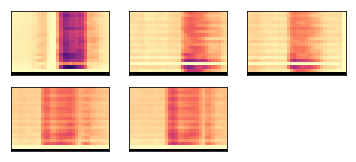

In [369]:
err = 0
print(data_path[err])
for i in range(err+0, err+5):
    plt.subplot(3, 3, i+1-err)
    librosa.display.specshow(mfcc[i], sr=sr)
    #librosa.display.specshow(mfcc[i], sr=sr, y_axis='mel', x_axis='time')
    #plt.colorbar()
    #plt.title('Mel-Spectrogram')

C:/Users/Kim JiHye/PycharmProjects/Voice_Overlay/git/practice_data/bird/00b01445_nohash_0.wav


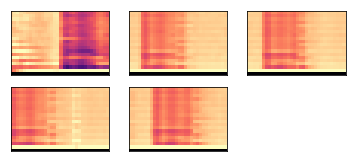

In [370]:
err = 10
print(data_path[err])
for i in range(err+0, err+5):
    plt.subplot(3, 3, i+1-err)
    librosa.display.specshow(mfcc[i], sr=sr)
    #librosa.display.specshow(mfcc[i], sr=sr, y_axis='mel', x_axis='time')
    #plt.colorbar()
    #plt.title('Mel-Spectrogram')

C:/Users/Kim JiHye/PycharmProjects/Voice_Overlay/git/practice_data/bird/00b01445_nohash_0.wav


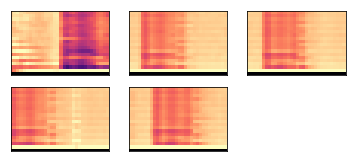

In [371]:
err = 10
print(data_path[err])
for i in range(err+0, err+5):
    plt.subplot(3, 3, i+1-err)
    librosa.display.specshow(mfcc[i], sr=sr)
    #librosa.display.specshow(mfcc[i], sr=sr, y_axis='mel', x_axis='time')
    #plt.colorbar()
    #plt.title('Mel-Spectrogram')

C:/Users/Kim JiHye/PycharmProjects/Voice_Overlay/git/practice_data/dog/00b01445_nohash_0.wav


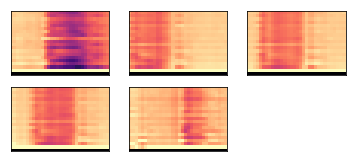

In [372]:
err = 30
print(data_path[err])
for i in range(err+0, err+5):
    plt.subplot(3, 3, i+1-err)
    librosa.display.specshow(mfcc[i], sr=sr)
    #librosa.display.specshow(mfcc[i], sr=sr, y_axis='mel', x_axis='time')
    #plt.colorbar()
    #plt.title('Mel-Spectrogram')

## Data Save

In [373]:
SAVE_PATH = './data/'
np.save(SAVE_PATH + 'data.npy', data)
np.save(SAVE_PATH + 'mfcc.npy', mfcc)
np.save(SAVE_PATH + 'label.npy', label)

## Data Load

In [374]:
SAVE_PATH = './data/'

mfcc = np.load(SAVE_PATH+'mfcc.npy')
label = np.load(SAVE_PATH+'label.npy')